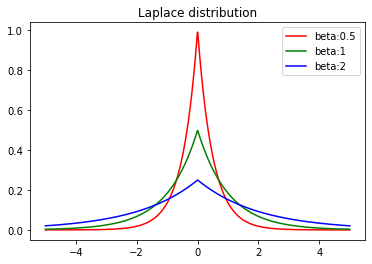

In [180]:
import matplotlib.pyplot as plt
import numpy as np
 
def laplace_function(x,beta):
    result = (1/(2*beta)) * np.e**(-1*(np.abs(x)/beta))
    #定义拉普拉斯分布
    return result
#在-5到5之间等间隔的取10000个数
x = np.linspace(-5,5,1000)
y1 = [laplace_function(x_,0.5) for x_ in x]
y2 = [laplace_function(x_,1) for x_ in x]
y3 = [laplace_function(x_,2) for x_ in x]

plt.plot(x,y1,color='r',label='beta:0.5')
plt.plot(x,y2,color='g',label='beta:1')
plt.plot(x,y3,color='b',label='beta:2')
plt.title("Laplace distribution")
plt.legend()
plt.show()

In [181]:
import pandas as pd
dataset=pd.read_csv('test.csv')
print(dataset)

      id     scores  noise  output
0      1  18.439021    0.0     0.0
1      2  60.296868    0.0     0.0
2      3  78.103672    0.0     0.0
3      4  34.320955    0.0     0.0
4      5  33.700116    0.0     0.0
..   ...        ...    ...     ...
994  995 -94.551816    0.0     0.0
995  996 -91.368978    0.0     0.0
996  997 -47.528984    0.0     0.0
997  998 -98.442098    0.0     0.0
998  999 -68.598337    0.0     0.0

[999 rows x 4 columns]


In [182]:
import numpy as np
#差分隐私数值保护实例
def noisyCount(sensitivety,epsilon):
    beta = sensitivety/epsilon
    u1 = np.random.random()
    u2 = np.random.random()
    if u1 <= 0.5:
        n_value = -beta*np.log(1.-u2)
    else:
        n_value = beta*np.log(u2)
    return n_value
x = dataset['scores'].copy()
noise = dataset['noise'].copy()

def laplace_mech(data,sensitivety,epsilon):
    for i in range(len(data)):
        data[i]+=noisyCount(sensitivety,epsilon)
        noise[i]=noisyCount(sensitivety,epsilon)
    return data
if __name__ =='__main__':
    sensitivety = 1
    epsilon = 1
    data = laplace_mech(x,sensitivety,epsilon)
    dataset['noise']=noise
    dataset['output']=data
    print(dataset)

      id     scores     noise     output
0      1  18.439021 -0.877068  18.883033
1      2  60.296868  0.832949  60.498085
2      3  78.103672 -0.211791  77.919619
3      4  34.320955 -0.499220  34.476539
4      5  33.700116  4.081290  33.476038
..   ...        ...       ...        ...
994  995 -94.551816 -0.683718 -93.958466
995  996 -91.368978 -1.460416 -91.554671
996  997 -47.528984 -0.167242 -46.426610
997  998 -98.442098 -0.126377 -98.744447
998  999 -68.598337 -0.157334 -70.600239

[999 rows x 4 columns]


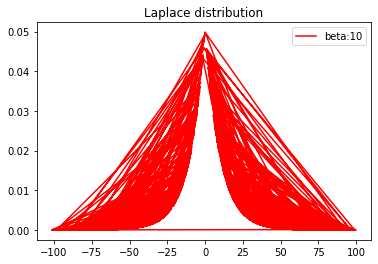

In [183]:
x = dataset['output']
beta=10
for i in range(len(x)):
    result = (1/(2*beta)) * np.e**(-1*(np.abs(x)/beta))
y = result
plt.plot(x,y,color='r',label='beta:10')
plt.title("Laplace distribution") 
plt.legend()
plt.show()

In [184]:
#差分隐私图片保护实例
import numpy as np